<a href="https://colab.research.google.com/github/glcn35/PANDAS/blob/main/DAwPy_EDA_Project_(Analyze_US_Citizens)_Student_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p style="text-align: center"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read data from file

In [3]:
df = pd.read_csv("/content/drive/MyDrive/adult_eda.csv")

# Try to undersstand what the data looks like? What are types of the features? Are there any missing values? Do I need to eliminate some features?  

Verilerin neye benzediğini anlamaya çalışın? Özelliklerin türleri nelerdir? Eksik değerler var mı? Bazı özellikleri ortadan kaldırmam gerekiyor mu?

In [4]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
df.shape

(32561, 15)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32561 non-null  int64  
 1   workclass       32561 non-null  object 
 2   fnlwgt          32561 non-null  int64  
 3   education       32561 non-null  object 
 4   education-num   31759 non-null  float64
 5   marital-status  32561 non-null  object 
 6   occupation      32561 non-null  object 
 7   relationship    27493 non-null  object 
 8   race            32561 non-null  object 
 9   sex             32561 non-null  object 
 10  capital-gain    32561 non-null  int64  
 11  capital-loss    32561 non-null  int64  
 12  hours-per-week  32561 non-null  int64  
 13  native-country  32561 non-null  object 
 14  salary          32561 non-null  object 
dtypes: float64(1), int64(5), object(9)
memory usage: 3.7+ MB


In [7]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,31759.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.082843,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.576172,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [8]:
df.isnull().sum()

age                  0
workclass            0
fnlwgt               0
education            0
education-num      802
marital-status       0
occupation           0
relationship      5068
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country       0
salary               0
dtype: int64

---
---

# Look at the value counts of columns that have object datatype and replace '?' like values with 'Unknown' word.  

Nesne veri türüne sahip sütunların değer sayılarına bakın ve '?' ile değiştirin. 'Bilinmeyen' kelimesi olan değerler gibi.

In [9]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

In [10]:
#df_new=df.filter(['workclass','education','marital-status','occupation','relationship','race','sex','native-country','salary'], axis=1)
#df_new.agg(["count","nunique"])

In [11]:
df.filter(['workclass','education','marital-status','occupation','relationship','race','sex','native-country','salary'], axis=1).describe()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,salary
count,32561,32561,32561,32561,27493,32561,32561,32561,32561
unique,9,16,7,15,5,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [12]:
#look at workclass column here


In [13]:
df.workclass.value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [14]:
df[df.workclass=="?"]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
27,54,?,180211,Some-college,10.0,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
61,32,?,293936,7th-8th,4.0,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
69,25,?,200681,Some-college,10.0,Never-married,?,NaN,White,Male,0,0,40,United-States,<=50K
77,67,?,212759,10th,6.0,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K
106,17,?,304873,10th,6.0,Never-married,?,NaN,White,Female,34095,0,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32530,35,?,320084,Bachelors,13.0,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32531,30,?,33811,Bachelors,13.0,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32539,71,?,287372,Doctorate,NaN,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32541,41,?,202822,HS-grad,9.0,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [15]:
df["workclass"].replace(to_replace="?", value="Unknown").value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
Unknown              1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [16]:
#replace all '?' in whole df with 'Unknown'


In [17]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12.0,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9.0,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9.0,Never-married,Adm-clerical,NaN,White,Male,0,0,20,United-States,<=50K


---
---

# Do education and education_num columns hold similar information? If so drop the appropriate choice between them.

Education ve Education_num sütunlarında benzer bilgiler var mı? Eğer öyleyse, aralarındaki uygun seçimi bırakın

In [18]:
df.education 

0         Bachelors
1         Bachelors
2           HS-grad
3              11th
4         Bachelors
            ...    
32556    Assoc-acdm
32557       HS-grad
32558       HS-grad
32559       HS-grad
32560       HS-grad
Name: education, Length: 32561, dtype: object

In [19]:
df["education-num"]

0        13.0
1        13.0
2         9.0
3         7.0
4        13.0
         ... 
32556    12.0
32557     9.0
32558     9.0
32559     9.0
32560     9.0
Name: education-num, Length: 32561, dtype: float64

In [20]:
df.groupby(["education","education-num"])["education-num"].count()

education     education-num
10th          6.0                916
11th          7.0               1146
12th          8.0                424
1st-4th       2.0                161
5th-6th       3.0                330
7th-8th       4.0                631
9th           5.0                503
Assoc-acdm    12.0              1044
Assoc-voc     11.0              1343
Bachelors     13.0              5247
Doctorate     16.0               405
HS-grad       9.0              10215
Masters       14.0              1687
Preschool     1.0                 50
Prof-school   15.0               559
Some-college  10.0              7098
Name: education-num, dtype: int64

In [21]:
df["education-num"].value_counts()

9.0     10215
10.0     7098
13.0     5247
14.0     1687
11.0     1343
7.0      1146
12.0     1044
6.0       916
4.0       631
15.0      559
5.0       503
8.0       424
16.0      405
3.0       330
2.0       161
1.0        50
Name: education-num, dtype: int64

In [22]:
#drop one of them here


In [23]:
df.isnull().sum()

age                  0
workclass            0
fnlwgt               0
education            0
education-num      802
marital-status       0
occupation           0
relationship      5068
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country       0
salary               0
dtype: int64

In [24]:
df.drop("education-num",axis=1,inplace=True)

In [25]:
df.isnull().sum()

age                  0
workclass            0
fnlwgt               0
education            0
marital-status       0
occupation           0
relationship      5068
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country       0
salary               0
dtype: int64

---
---

# Take a look at correlation between variables and also see if there are some outliers in any of the columns.


Değişkenler arasındaki korelasyona bir göz atın ve ayrıca herhangi bir sütunda bazı aykırı değerler olup olmadığına bakın.

In [26]:
df.corr()

,age,fnlwgt,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076646,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,0.000432,-0.010252,-0.018768
capital-gain,0.077674,0.000432,1.000000,-0.031615,0.078409
capital-loss,0.057775,-0.010252,-0.031615,1.000000,0.054256
hours-per-week,0.068756,-0.018768,0.078409,0.054256,1.000000


In [27]:
df.describe()

,age,fnlwgt,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,99999.000000,4356.000000,99.000000


In [28]:
#age column
#IQR = 

In [29]:
Q1=df.age.quantile(0.25)
Q1

28.0

In [30]:
Q3=df.age.quantile(0.75)
Q3

48.0

In [31]:
IQR= Q3-Q1
IQR

20.0

In [32]:
upper_lim= Q3 +1.5*IQR
upper_lim

78.0

In [33]:
df[df["age"] >= upper_lim]["age"].value_counts()

90    43
78    23
79    22
80    22
81    20
82    12
84    10
83     6
88     3
85     3
86     1
87     1
Name: age, dtype: int64

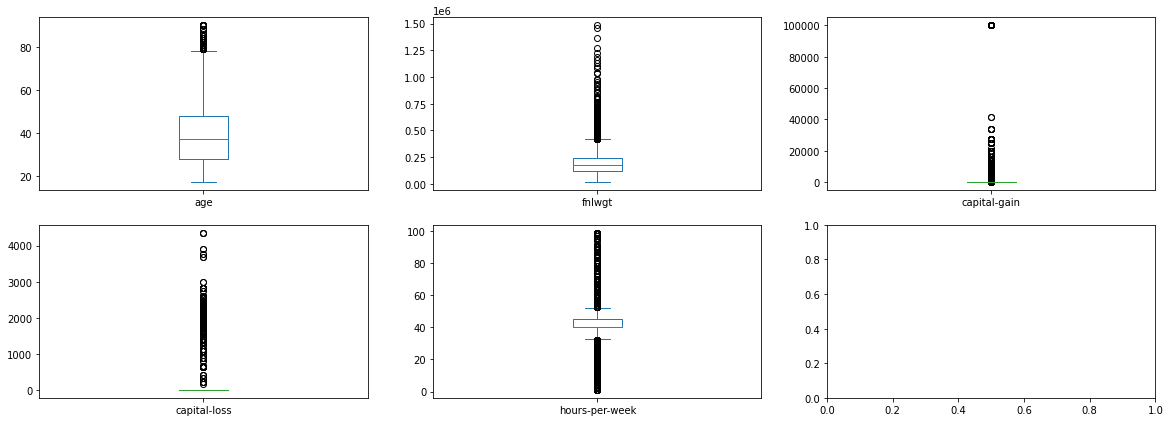

In [34]:
fig ,ax = plt.subplots(2,3,figsize=(20,7))
x = 0
y = 0
for column in df.select_dtypes('number').columns:
    
    df[column].plot(kind = "box", ax = ax[x,y])
    if y < 2:
        y += 1
    else:
        x += 1
        y = 0

In [35]:
df[(df["hours-per-week"] == 99)].sample(10)

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
21147,39,Private,348521,Some-college,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,2415,99,United-States,>50K
23226,51,Self-emp-not-inc,88528,Assoc-acdm,Divorced,Exec-managerial,Unmarried,White,Female,0,0,99,United-States,<=50K
25354,65,Private,89681,Masters,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,99,United-States,<=50K
9831,67,Private,35015,Masters,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,99,United-States,<=50K
15534,29,Private,167716,HS-grad,Divorced,Other-service,Unmarried,White,Female,0,0,99,United-States,<=50K
23398,66,Private,28367,Bachelors,Married-civ-spouse,Priv-house-serv,Other-relative,White,Male,0,0,99,United-States,<=50K
25806,49,?,31478,7th-8th,Married-civ-spouse,?,Husband,White,Male,0,0,99,United-States,<=50K
26596,35,Private,297574,Assoc-acdm,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,99,United-States,>50K
13858,37,Private,51264,Doctorate,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,99,France,>50K
19053,27,Private,40295,HS-grad,Never-married,Transport-moving,Not-in-family,White,Male,0,0,99,United-States,<=50K


In [36]:
#hours per week column
#IQR = 

In [37]:
df["hours-per-week"].describe()

count    32561.000000
mean        40.437456
std         12.347429
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours-per-week, dtype: float64

In [38]:
Q1=df["hours-per-week"].quantile(0.25)
Q1

40.0

In [39]:
Q3=df["hours-per-week"].quantile(0.75)
Q3

45.0

In [40]:
IQR=Q3-Q1
IQR

5.0

In [41]:
upper_lim2=Q3 +1.5*IQR
upper_lim2

52.5

In [42]:
# find outlier values which extends the upper limit in both age and hours-per-week columns   hem yaş hem de haftalık saat sütunlarında üst sınırı genişleten aykırı değerleri bulun

In [43]:
df[(df["hours-per-week"]> upper_lim2)&(df["age"] >=upper_lim)]

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
3777,80,Private,87518,Some-college,Never-married,Prof-specialty,Not-in-family,White,Male,0,1816,60,United-States,<=50K
5370,90,Local-gov,227796,Masters,Married-civ-spouse,Exec-managerial,Husband,White,Male,20051,0,60,United-States,>50K
7481,83,Private,195507,HS-grad,Widowed,Protective-serv,Not-in-family,White,Male,0,0,55,United-States,<=50K
7720,84,Private,241065,Masters,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,66,United-States,<=50K
8806,90,Private,87372,Prof-school,Married-civ-spouse,Prof-specialty,Husband,White,Male,20051,0,72,United-States,>50K
10546,78,?,33186,7th-8th,Married-civ-spouse,?,Husband,White,Male,0,0,60,United-States,<=50K
11996,90,Private,40388,Bachelors,Never-married,Exec-managerial,Not-in-family,White,Male,0,0,55,United-States,<=50K
12830,81,Private,201398,Masters,Widowed,Prof-specialty,Unmarried,White,Male,0,0,60,?,<=50K
15356,90,Private,90523,HS-grad,Widowed,Transport-moving,Unmarried,White,Male,0,0,99,United-States,<=50K
24395,83,Self-emp-inc,153183,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,2392,55,United-States,>50K


# After looking at the outliers you can drop the rows which actually does not make any sense. 
Aykırı değerlere baktıktan sonra aslında hiçbir anlam ifade etmeyen satırları bırakabilirsiniz.

** Hint: You can check age and hours per week columns. **

** İpucu: Yaş ve haftalık saat sütunlarını kontrol edebilirsiniz. **

In [44]:
outliers=(df["hours-per-week"]>upper_lim2)&(df["age"] >upper_lim)
df[outliers]

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
3777,80,Private,87518,Some-college,Never-married,Prof-specialty,Not-in-family,White,Male,0,1816,60,United-States,<=50K
5370,90,Local-gov,227796,Masters,Married-civ-spouse,Exec-managerial,Husband,White,Male,20051,0,60,United-States,>50K
7481,83,Private,195507,HS-grad,Widowed,Protective-serv,Not-in-family,White,Male,0,0,55,United-States,<=50K
7720,84,Private,241065,Masters,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,66,United-States,<=50K
8806,90,Private,87372,Prof-school,Married-civ-spouse,Prof-specialty,Husband,White,Male,20051,0,72,United-States,>50K
11996,90,Private,40388,Bachelors,Never-married,Exec-managerial,Not-in-family,White,Male,0,0,55,United-States,<=50K
12830,81,Private,201398,Masters,Widowed,Prof-specialty,Unmarried,White,Male,0,0,60,?,<=50K
15356,90,Private,90523,HS-grad,Widowed,Transport-moving,Unmarried,White,Male,0,0,99,United-States,<=50K
24395,83,Self-emp-inc,153183,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,2392,55,United-States,>50K


In [45]:
df.loc[outliers].index

Int64Index([3777, 5370, 7481, 7720, 8806, 11996, 12830, 15356, 24395], dtype='int64')

In [46]:
outliers_index=df.loc[outliers].index

In [47]:
df.drop(outliers_index,inplace=True)

In [48]:
# check outlier values which extends the upper limit in both age and hours-per-week columns  
# hem yaş hem de haftalık saat sütunlarında üst sınırı genişleten aykırı değerleri kontrol edin

In [49]:
df[outliers]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary


# Impute missing values in relationship column with 'Unmarried'. Also replace 'Not-in-family','Other-relative' values in this column with 'Unmarried'?

'Evlenmemiş' ile ilişki sütununda eksik değerleri empoze edin. Ayrıca bu sütundaki 'Aileden değil', 'Diğer akraba' değerleri 'Evlenmemiş' ile değiştirilsin mi?

In [50]:
df.relationship.value_counts()

Husband           13190
Not-in-family      8301
Unmarried          3444
Wife               1568
Other-relative      981
Name: relationship, dtype: int64

In [51]:
df.relationship.replace(to_replace=["Other-relative","Not-in-family"], value="Unmarried",inplace=True)

In [52]:
df.relationship.value_counts()

Husband      13190
Unmarried    12726
Wife          1568
Name: relationship, dtype: int64

---
# How many of each race are represented in this dataset?

Bu veri setinde her ırktan kaç tanesi temsil ediliyor?
---

In [53]:
race_count=df.race.value_counts()
race_count

White                 27807
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

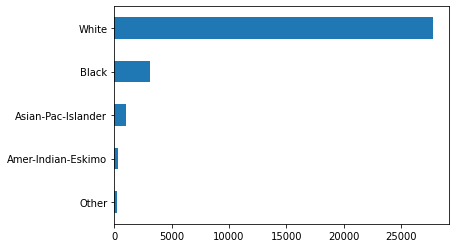

In [54]:
race_count.sort_values().plot.barh();

---
# What is the average age of men/women?
---

Erkeklerin/kadınların yaş ortalaması nedir?

In [55]:
df.groupby("sex")["age"].mean()

sex
Female    36.858230
Male      39.414444
Name: age, dtype: float64

In [56]:
average_age_men=df[df.sex =="Male"]["age"].mean()
average_age_men

39.41444378127726

In [57]:
round(average_age_men,1)

39.4

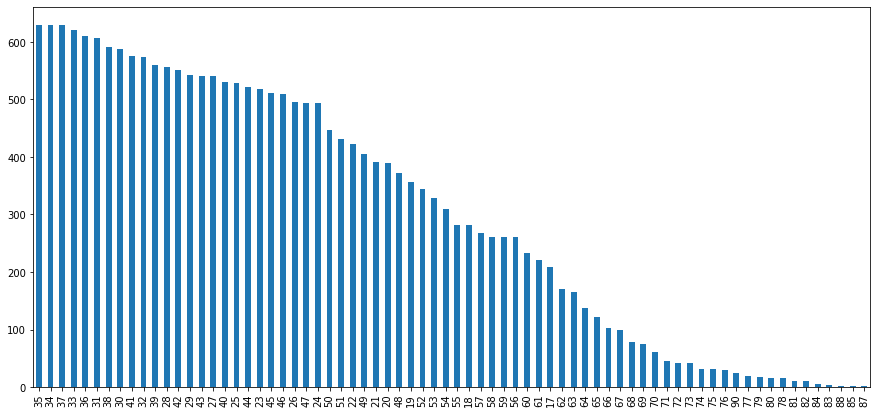

In [58]:
plt.figure(figsize = (15,7))
df.loc[df["sex"] == "Male", "age"].value_counts().plot.bar();

In [59]:
average_age_women=df[df.sex =="Female"]["age"].mean()
average_age_women

36.85823043357163

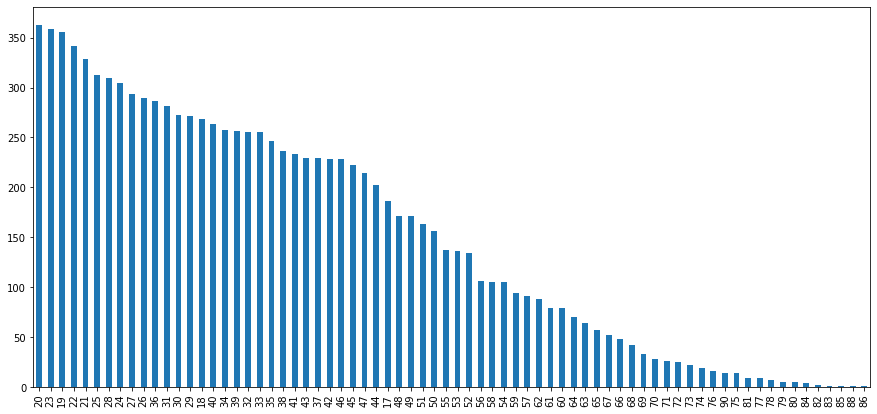

In [60]:
plt.figure(figsize = (15,7))
df.loc[df["sex"] == "Female", "age"].value_counts().plot.bar();

---
# What is the percentage of people who have a Bachelor's degree?
--- Lisans derecesine sahip kişilerin yüzdesi nedir?

In [61]:
df.groupby("education")["education"].count()

education
10th              933
11th             1175
12th              433
1st-4th           168
5th-6th           333
7th-8th           646
9th               514
Assoc-acdm       1067
Assoc-voc        1382
Bachelors        5353
Doctorate         413
HS-grad         10499
Masters          1720
Preschool          51
Prof-school       575
Some-college     7290
Name: education, dtype: int64

In [62]:
df.education.value_counts()

HS-grad         10499
Some-college     7290
Bachelors        5353
Masters          1720
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       575
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

In [63]:
df[df.education=="Bachelors"]["education"].count()


5353

In [64]:
df["education"].count()

32552

In [65]:
percentage_bachelors= df[df.education=="Bachelors"]["education"].count()/df["education"].count() *100
percentage_bachelors

16.44445809781273

In [66]:
round(percentage_bachelors,1)

16.4

In [67]:
df["education"].value_counts(normalize=True)

HS-grad         0.322530
Some-college    0.223949
Bachelors       0.164445
Masters         0.052839
Assoc-voc       0.042455
11th            0.036096
Assoc-acdm      0.032778
10th            0.028662
7th-8th         0.019845
Prof-school     0.017664
9th             0.015790
12th            0.013302
Doctorate       0.012687
5th-6th         0.010230
1st-4th         0.005161
Preschool       0.001567
Name: education, dtype: float64

In [68]:
percentage_bachelors = df["education"].value_counts(normalize=True).loc["Bachelors"]*100
round(percentage_bachelors,1)

16.4

In [69]:
print(f"The percentage of people who have a Bachelor's degree : %{round(percentage_bachelors,1)}")

The percentage of people who have a Bachelor's degree : %16.4


---
# What percentage of people with advanced education (`Bachelors`, `Masters`, or `Doctorate`) make more than 50K?
---

İleri eğitim (Lisans, Yüksek Lisans veya Doktora) olan kişilerin yüzde kaçı 50K'dan fazla kazanıyor?


In [70]:
df.salary.value_counts()

<=50K    24714
>50K      7838
Name: salary, dtype: int64

In [71]:
df.education.value_counts()

HS-grad         10499
Some-college     7290
Bachelors        5353
Masters          1720
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       575
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

In [72]:
(df.education=="Bachelors")|(df.education=="Masters")|(df.education=="Doctorate")

0         True
1         True
2        False
3        False
4         True
         ...  
32556    False
32557    False
32558    False
32559    False
32560    False
Name: education, Length: 32552, dtype: bool

In [73]:
df_high_edu =df[((df.education=="Bachelors")|(df.education=="Masters")|(df.education=="Doctorate"))]
df_high_edu

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,Unmarried,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
4,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
8,31,Private,45781,Masters,Never-married,Prof-specialty,Unmarried,White,Female,14084,0,50,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32538,38,Private,139180,Bachelors,Divorced,Prof-specialty,Unmarried,Black,Female,15020,0,45,United-States,>50K
32539,71,?,287372,Doctorate,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32544,31,Private,199655,Masters,Divorced,Other-service,Unmarried,Other,Female,0,0,30,United-States,<=50K
32553,32,Private,116138,Masters,Never-married,Tech-support,Unmarried,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K


In [74]:
df[((df.education=="Bachelors")|(df.education=="Masters")|(df.education=="Doctorate"))&(df.salary==">50K")]


,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
8,31,Private,45781,Masters,Never-married,Prof-specialty,Unmarried,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
11,30,State-gov,141297,Bachelors,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K
19,43,Self-emp-not-inc,292175,Masters,Divorced,Exec-managerial,Unmarried,White,Female,0,0,45,United-States,>50K
20,40,Private,193524,Doctorate,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,60,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32533,54,Private,337992,Bachelors,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,0,0,50,Japan,>50K
32536,34,Private,160216,Bachelors,Never-married,Exec-managerial,Unmarried,White,Female,0,0,55,United-States,>50K
32538,38,Private,139180,Bachelors,Divorced,Prof-specialty,Unmarried,Black,Female,15020,0,45,United-States,>50K
32539,71,?,287372,Doctorate,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K


In [75]:
df.education.count()

32552

In [76]:
len(df[((df.education=="Bachelors")|(df.education=="Masters")|(df.education=="Doctorate"))&(df.salary==">50K")])

3484

In [77]:
 perc_high_edu =len(df[((df.education=="Bachelors")|(df.education=="Masters")|(df.education=="Doctorate"))&(df.salary==">50K")])/df.education.count()

In [78]:
perc_high_edu

0.10702875399361023

In [79]:
print(f"Percentage of people with advanced education make more than 50K : {round(perc_high_edu * 100, 2)}")

Percentage of people with advanced education make more than 50K : 10.7


---
# What percentage of people without advanced education make more than 50K?
---# İleri eğitimi olmayan insanların yüzde kaçı 50.000'den fazla kazanıyor?

In [80]:
lower_education = (~((df.education=="Bachelors")|(df.education=="Masters")|(df.education=="Doctorate")))
lower_education.sum()

25066

In [81]:
df_low_edu = df[(~((df.education=="Bachelors")|(df.education=="Masters")|(df.education=="Doctorate")))]
df_low_edu

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
2,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Unmarried,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
6,49,Private,160187,9th,Married-spouse-absent,Other-service,Unmarried,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
10,37,Private,280464,Some-college,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,Never-married,Adm-clerical,NaN,White,Male,0,0,20,United-States,<=50K


In [82]:
perc_low_edu =df[(~((df.education=="Bachelors")|(df.education=="Masters")|(df.education=="Doctorate")))&(df.salary==">50K")]
perc_low_edu

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
7,52,Self-emp-not-inc,209642,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
10,37,Private,280464,Some-college,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K
14,40,Private,121772,Assoc-voc,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,?,>50K
27,54,?,180211,Some-college,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
38,31,Private,84154,Some-college,Married-civ-spouse,Sales,Husband,White,Male,0,0,38,?,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32518,57,Local-gov,110417,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,99999,0,40,United-States,>50K
32519,46,Private,364548,Some-college,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,48,United-States,>50K
32545,39,Local-gov,111499,Assoc-acdm,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,20,United-States,>50K
32557,40,Private,154374,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K


In [90]:
count= len(perc_low_edu)

In [91]:
count

4354

In [93]:
perc_low_edu = count/ df.education.count()
perc_low_edu 

0.13375522241336937

In [94]:
print(f"Percentage of people without advanced education make more than 50K : {round(perc_low_edu * 100 ,2)}")

Percentage of people without advanced education make more than 50K : 13.38


In [95]:
if perc_high_edu > perc_low_edu :
    print("More education more money!")
else:
    print("Education has no clear effet on salary. You should investigate some other features also.")

Education has no clear effet on salary. You should investigate some other features also.


---
# What percentage of the people who work the minimum number of hours per week have a salary of >50K?
---
Haftada en az saat çalışan insanların yüzde kaçının 50K maaşı var?

In [123]:
df["hours-per-week"].sort_values()

5632      1
5808      1
32525     1
22960     1
20072     1
         ..
19731    99
8796     99
29187    99
8393     99
8072     99
Name: hours-per-week, Length: 32552, dtype: int64

In [124]:
df[(df.salary==">50K")&(df["hours-per-week"]==1)]

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
189,58,State-gov,109567,Doctorate,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,1,United-States,>50K
20072,65,?,76043,HS-grad,Married-civ-spouse,?,Husband,White,Male,0,0,1,United-States,>50K


In [125]:
lazy_riches = (df.salary==">50K")&(df["hours-per-week"]==1)
lazy_riches

0        False
1        False
2        False
3        False
4        False
         ...  
32556    False
32557    False
32558    False
32559    False
32560    False
Length: 32552, dtype: bool

In [126]:
num_lazy_riches = len(df[(df.salary==">50K")&(df["hours-per-week"]==1)])
num_lazy_riches

2

In [127]:
df[df["hours-per-week"]==1]

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
189,58,State-gov,109567,Doctorate,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,1,United-States,>50K
1036,66,Self-emp-inc,150726,9th,Married-civ-spouse,Exec-managerial,Husband,White,Male,1409,0,1,?,<=50K
1262,69,?,195779,Assoc-voc,Widowed,?,Unmarried,White,Female,0,0,1,United-States,<=50K
5590,78,?,363134,HS-grad,Widowed,?,Unmarried,White,Female,0,0,1,United-States,<=50K
5632,45,?,189564,Masters,Married-civ-spouse,?,Wife,White,Female,0,0,1,United-States,<=50K
5766,62,?,97231,Some-college,Married-civ-spouse,?,Wife,White,Female,0,0,1,United-States,<=50K
5808,76,?,211574,10th,Married-civ-spouse,?,Husband,White,Male,0,0,1,United-States,<=50K
8447,67,?,244122,Assoc-voc,Widowed,?,Unmarried,White,Female,0,0,1,United-States,<=50K
9147,75,?,260543,10th,Widowed,?,Unmarried,Asian-Pac-Islander,Female,0,0,1,China,<=50K
11451,27,Private,147951,HS-grad,Never-married,Machine-op-inspct,Unmarried,White,Male,0,0,1,United-States,<=50K


In [128]:
num_min_workers = len(df[df["hours-per-week"]==1])
num_min_workers

20

In [198]:
print (f"Percentage of the people who work the minimum number of hours per week have a salary of >50K : % {round(num_lazy_riches/num_min_workers*100)}")

Percentage of the people who work the minimum number of hours per week have a salary of >50K : % 10


 ---
 # What country has the highest percentage of people that earn >50K?
 ---
Hangi ülke 50K kazananların en yüksek yüzdesine sahip?

In [ ]:
country_salary_df =df["native-country"][df.salary==">50K"].value_counts()
country_salary_df

In [218]:
df["native-country"][df.salary==">50K"].value_counts()

United-States         7168
?                      146
Philippines             61
Germany                 44
India                   40
Canada                  39
Mexico                  33
England                 30
Italy                   25
Cuba                    25
Japan                   24
Taiwan                  20
China                   20
Iran                    18
South                   16
Puerto-Rico             12
Poland                  12
France                  12
Jamaica                 10
El-Salvador              9
Greece                   8
Cambodia                 7
Hong                     6
Yugoslavia               6
Ireland                  5
Vietnam                  5
Portugal                 4
Haiti                    4
Ecuador                  4
Thailand                 3
Hungary                  3
Guatemala                3
Scotland                 3
Nicaragua                2
Trinadad&Tobago          2
Laos                     2
Columbia                 2
D

In [226]:
from locale import normalize
df.loc[df["salary"] == ">50K", "native-country"].value_counts(normalize)

United-States         0.914519
?                     0.018627
Philippines           0.007783
Germany               0.005614
India                 0.005103
Canada                0.004976
Mexico                0.004210
England               0.003828
Italy                 0.003190
Cuba                  0.003190
Japan                 0.003062
Taiwan                0.002552
China                 0.002552
Iran                  0.002297
South                 0.002041
Puerto-Rico           0.001531
Poland                0.001531
France                0.001531
Jamaica               0.001276
El-Salvador           0.001148
Greece                0.001021
Cambodia              0.000893
Hong                  0.000766
Yugoslavia            0.000766
Ireland               0.000638
Vietnam               0.000638
Portugal              0.000510
Haiti                 0.000510
Ecuador               0.000510
Thailand              0.000383
Hungary               0.000383
Guatemala             0.000383
Scotland

In [ ]:
country_salary_df_riches = 
country_salary_df_riches

,salary
native-country,
Cambodia,7
Canada,39
China,20
Columbia,2
Cuba,25
Dominican-Republic,2
Ecuador,4
El-Salvador,9
England,30


In [ ]:
rich_per_country =
rich_per_country

,salary
native-country,
Dominican-Republic,0.028571
Columbia,0.033898
Guatemala,0.046875
Mexico,0.051322
Nicaragua,0.058824
Peru,0.064516
Vietnam,0.074627
Honduras,0.076923
El-Salvador,0.084906


In [221]:
rich_per_country =df["native-country"][df.salary==">50K"].value_counts(normalize=True)
rich_per_country

United-States         0.914519
?                     0.018627
Philippines           0.007783
Germany               0.005614
India                 0.005103
Canada                0.004976
Mexico                0.004210
England               0.003828
Italy                 0.003190
Cuba                  0.003190
Japan                 0.003062
Taiwan                0.002552
China                 0.002552
Iran                  0.002297
South                 0.002041
Puerto-Rico           0.001531
Poland                0.001531
France                0.001531
Jamaica               0.001276
El-Salvador           0.001148
Greece                0.001021
Cambodia              0.000893
Hong                  0.000766
Yugoslavia            0.000766
Ireland               0.000638
Vietnam               0.000638
Portugal              0.000510
Haiti                 0.000510
Ecuador               0.000510
Thailand              0.000383
Hungary               0.000383
Guatemala             0.000383
Scotland

,salary
native-country,
Iran,0.418605


In [ ]:
#use iloc here

,salary
native-country,
Iran,0.418605


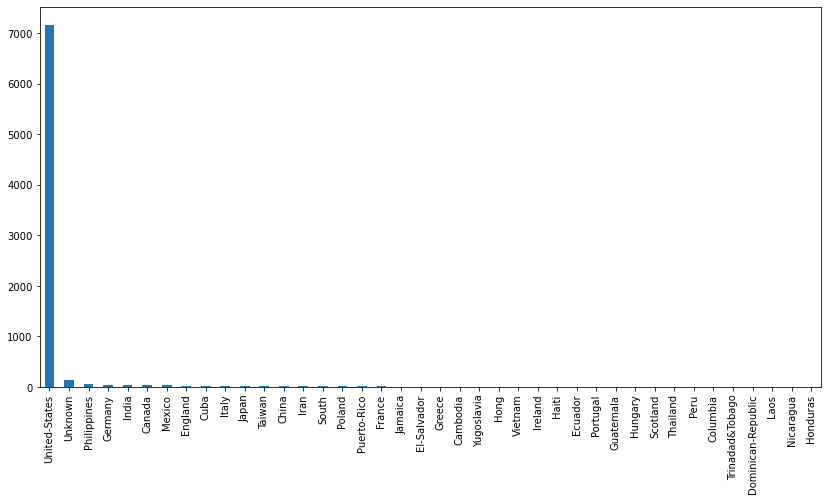

In [ ]:
plt.figure(figsize=(14,7))
df.loc[df["salary"] == ">50K", "native-country"].value_counts().plot(kind="bar");

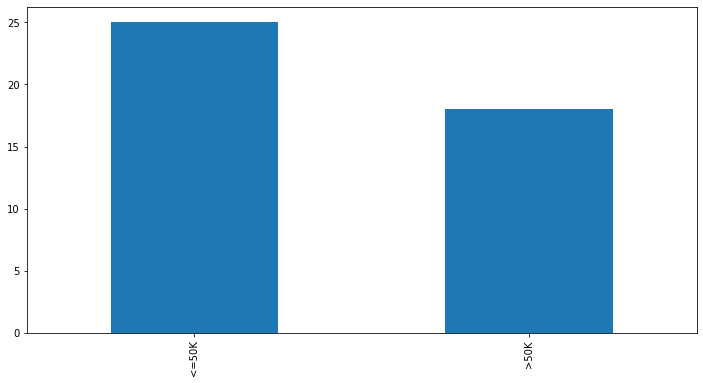

In [ ]:
plt.figure(figsize=(12,6))
df.loc[((df["native-country"] == "Iran")), "salary"].value_counts().plot.bar();

---
# Identify the most popular occupation for those who earn >50K in India.
---
# Hindistan'da 50k kazananlar için en popüler işgali tanımlar.

In [ ]:
top_IN_occupation =(df["native-country"]=="India")&(df["salary"]==">50K")

top_IN_occupation

In [ ]:
df[top_IN_occupation]=df[(df["native-country"]=="India")&(df["salary"]==">50K")]
df[top_IN_occupation]

In [172]:
df[top_IN_occupation]["occupation"].value_counts()

Prof-specialty      25
Exec-managerial      8
Other-service        2
Tech-support         2
Transport-moving     1
Sales                1
Adm-clerical         1
Name: occupation, dtype: int64

'Prof-specialty'

In [195]:
df[top_IN_occupation]["occupation"].value_counts().head(1)

Prof-specialty    25
Name: occupation, dtype: int64

In [190]:
df[top_IN_occupation]["occupation"].mode()

0    Prof-specialty
dtype: object

In [191]:
a = df[top_IN_occupation]["occupation"].mode()
a

0    Prof-specialty
dtype: object

In [192]:
print(f"{a} the most popular occupation for those who earn >50K in India.")

0    Prof-specialty
dtype: object the most popular occupation for those who earn >50K in India.


----
---